# Cleaning Flights dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#gathering">Gathering the data</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#exporting">Exporting to csv</a></li>
</ul>

<a id='gathering'></a>
## Gathering

In [1]:
# import necessary librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import of the 12 csv into a dictionnary of dataframes
df = {}
for x in range(1,13):
    if x < 10:
        df["month_0{0}".format(x)]= pd.read_csv(f'work_P4/Data_P4/2016_0{x}.csv',encoding='utf_8', low_memory=False,
                                               error_bad_lines=False)
        print(f'month_0{x} loaded')
    else:
        df["month_{0}".format(x)]= pd.read_csv(f'work_P4/Data_P4/2016_{x}.csv',encoding='utf_8', low_memory=False,
                                               error_bad_lines=False)
        print(f'month_{x} loaded')

month_01 loaded
month_02 loaded
month_03 loaded


b'Skipping line 121012: expected 65 fields, saw 75\nSkipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\nSkipping line 453858: expected 65 fields, saw 97\n'


month_04 loaded
month_05 loaded
month_06 loaded
month_07 loaded
month_08 loaded
month_09 loaded
month_10 loaded
month_11 loaded
month_12 loaded


In [3]:
# Checking the amount of features
for v in df.values():
    print(v.shape)

(445827, 65)
(423889, 65)
(479122, 65)
(479950, 65)
(479358, 65)
(487637, 65)
(502457, 65)
(498347, 65)
(454878, 65)
(472626, 65)
(450938, 65)
(460949, 65)


> All of the 12 dataframes have the same amount of features = 65

In [4]:
# Quick vieuw on all the column names
print(df['month_01'].columns.values.tolist())

['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LO

<a id='assessing'></a>
## Assessing

### Visual inspection

#### Are all the columns equals in the 12 dataframes?

In [5]:
reference_list = df['month_01'].columns.values.tolist() 
for month,value in df.items():
    print(f'{month} :')
    print(reference_list == v.columns.values.tolist())

month_01 :
True
month_02 :
True
month_03 :
True
month_04 :
True
month_05 :
True
month_06 :
True
month_07 :
True
month_08 :
True
month_09 :
True
month_10 :
True
month_11 :
True
month_12 :
True


> the columns are the same in the 12 dataframes, what will make it possible to concatenate them into 1 bigger dataframe

#### Inspecting the 5 first lines of Month_01

In [6]:
df['month_01'][['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 
               'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 
               'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS']].head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48


In [7]:
df['month_01'][['ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 
                'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 
                'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
                'DEP_TIME_BLK']].head()

,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK
0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159
1,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159
2,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159
3,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159
4,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159


In [8]:
df['month_01'][['TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 
                'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 
                'CANCELLATION_CODE']].head()

,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE
0,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN
1,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN
2,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN
3,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN
4,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN


In [9]:
df['month_01'][['DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 
                'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY']].head()

,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY
0,0.0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN
1,0.0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN
2,0.0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN
3,0.0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN
4,0.0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0


In [10]:
df['month_01'][['NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 
                'LONGEST_ADD_GTIME', 'Unnamed: 64']].head()

,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.0,0.0,66.0,NaN,NaN,NaN,NaN


#### Concatenation of the different dataframes

In [11]:
df.keys()

dict_keys(['month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12'])

In [12]:
# Append all the values of the df dictionnary
df_frames = []
for val in df.values():
    df_frames.append(val)

##### Code

In [13]:
# concatenate the different frames in df_flights
df_concatenated = pd.concat(df_frames,ignore_index=True)

In [14]:
# For the rest of the study hereunder we'll work on a COPY of the data for safety reasons
df_flights = df_concatenated.copy() 

##### Test

In [15]:
# Check size
tot_amount_lines = 0
for val in df.values():
    tot_amount_lines = tot_amount_lines + val.shape[0]

In [16]:
# check with concatenated dataframe size
df_flights.shape[0] == tot_amount_lines

True

### General info

#### 'UNIQUE_CARRIER', 	'AIRLINE_ID' and	'CARRIER'

In [17]:
df_flights.query('UNIQUE_CARRIER != CARRIER')[['UNIQUE_CARRIER','AIRLINE_ID','CARRIER']]

,UNIQUE_CARRIER,AIRLINE_ID,CARRIER
1810646,10397,1039705,30397


In [18]:
df_flights[['UNIQUE_CARRIER','AIRLINE_ID','CARRIER']].sample(10)

,UNIQUE_CARRIER,AIRLINE_ID,CARRIER
490128,EV,20366,EV
658100,DL,19790,DL
4126475,WN,19393,WN
3027898,B6,20409,B6
1025818,WN,19393,WN
5530505,VX,21171,VX
1209821,UA,19977,UA
4999246,OO,20304,OO
5026596,UA,19977,UA
983716,F9,20436,F9


In [19]:
df_concatenated.UNIQUE_CARRIER.value_counts()

WN       1296854
DL        970822
AA        886058
OO        604283
UA        545067
EV        503345
B6        284667
AS        166957
NK        138199
F9         95857
HA         76536
VX         67332
10397          1
Name: UNIQUE_CARRIER, dtype: int64

In [20]:
df_concatenated.CARRIER.value_counts()

WN       1296854
DL        970822
AA        886058
OO        604283
UA        545067
EV        503345
B6        284667
AS        166957
NK        138199
F9         95857
HA         76536
VX         67332
30397          1
Name: CARRIER, dtype: int64

In [21]:
df_concatenated.AIRLINE_ID.value_counts()

19393      1296854
19790       970822
19805       886058
20304       604283
19977       545067
20366       503345
20409       284667
19930       166957
20416       138199
20436        95857
19690        76536
21171        67332
1039705          1
Name: AIRLINE_ID, dtype: int64

> Those 3 columns seems redundant, we'll keep only UNIQUE_CARRIER

### First filtering of columns to keep

In [22]:
filter_01 = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','FL_DATE','UNIQUE_CARRIER','TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 
  'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_DELAY', 
 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 
 'DIVERTED','AIR_TIME', 'DISTANCE', 'CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 
 'LATE_AIRCRAFT_DELAY',]

In [23]:
df_flights = df_flights[filter_01]

In [24]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635978 entries, 0 to 5635977
Data columns (total 32 columns):
YEAR                   object
MONTH                  int64
DAY_OF_MONTH           object
DAY_OF_WEEK            object
FL_DATE                object
UNIQUE_CARRIER         object
TAIL_NUM               object
FL_NUM                 object
ORIGIN_AIRPORT_ID      object
ORIGIN                 object
ORIGIN_STATE_ABR       object
DEST_AIRPORT_ID        object
DEST                   object
DEST_STATE_ABR         object
CRS_DEP_TIME           float64
DEP_DELAY              float64
TAXI_OUT               object
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_D

### Missing Values

In [25]:
# Percentage of missing values
(df_flights.isnull().sum().sort_values(ascending=False)/df_flights.shape[0])*100

CANCELLATION_CODE      98.829396
LATE_AIRCRAFT_DELAY    82.816824
NAS_DELAY              82.816824
WEATHER_DELAY          82.816824
CARRIER_DELAY          82.816824
SECURITY_DELAY         82.816824
AIR_TIME                1.415602
ARR_DELAY               1.415566
TAXI_IN                 1.206233
WHEELS_ON               1.206233
TAXI_OUT                1.162584
WHEELS_OFF              1.162584
DEP_DELAY               1.127382
TAIL_NUM                0.226225
DISTANCE                0.000089
DIVERTED                0.000071
CRS_ARR_TIME            0.000053
CANCELLED               0.000053
DEST_STATE_ABR          0.000018
DEST                    0.000018
MONTH                   0.000000
DAY_OF_MONTH            0.000000
DAY_OF_WEEK             0.000000
FL_DATE                 0.000000
UNIQUE_CARRIER          0.000000
ORIGIN                  0.000000
FL_NUM                  0.000000
ORIGIN_AIRPORT_ID       0.000000
ORIGIN_STATE_ABR        0.000000
DEST_AIRPORT_ID         0.000000
CRS_DEP_TI

### Duplicates

In [26]:
df_flights.duplicated().sum()

0

> No duplicates has been found

#### First Comments

- **First filtering the columns:**
    - based on information found on : https://www.transtats.bts.gov/Fields.asp?Table_ID=236
    - and first observations with visualisation of 5 first lines
    
- **Missing values :**
    - For "CANCELLATION_CODE" over 98% of values missing
    - For "LATE_AIRCRAFT_DELAY", "NAS_DELAY", "WEATHER_DELAY", "CARRIER_DELAY" and "SECURITY DELAY" over 82% missing
    - All the rest have less than 1.5% of missing values
    
- **Duplicates :**
    - No duplicates have been found
- **Conversion of types :**
    - 'YEAR', 'QUARTER', 'DAY_OF_MONTH', 'DAY_OF_WEEK4' conversion to int
    - 'CANCELLED' and 'DIVERTED' conversion from floats to int
    - 'CANCELLATION_CODE' to categorical data
    
- **Additional comments :**
    - FL_DATE  is redundant, but for the moment we'll keep it (could be interesting with datetime in regression part)
    - we'll only keep 'UNIQUE CARRIER' ('CARRIER' and 'AIRLINE_ID' are redundant)
    - other redundant information as 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', we dropped from the study
    - another example of redundancy = 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID'
    

<a id='cleaning'></a>
## Cleaning

<a href="#table">Table of Content</a>

#### 1. Handling missing values: Delay types, CANCELLATION_CODE and TAIL_NUM

##### Define

> - We'll suppose that **missing values** for the different types of DELAY's mean that there wasn't any of this type of delay. Consequently, we'll replace those by zero.

##### Code

In [27]:
# Types of Delays
df_flights[['LATE_AIRCRAFT_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY','SECURITY_DELAY']]=\
      df_flights[['LATE_AIRCRAFT_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY','SECURITY_DELAY']].fillna(value=0)

In [28]:
# TAIL_NUM
df_flights['TAIL_NUM'] = df_flights['TAIL_NUM'].fillna(value='unknown')

In [29]:
# CANCELLATION_CODE
df_flights['CANCELLATION_CODE'] = df_flights['CANCELLATION_CODE'].fillna(value=' ') 

##### Test

In [30]:
# Types of delays
df_flights[['LATE_AIRCRAFT_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY','SECURITY_DELAY']].isnull().sum()

LATE_AIRCRAFT_DELAY    0
NAS_DELAY              0
WEATHER_DELAY          0
CARRIER_DELAY          0
SECURITY_DELAY         0
dtype: int64

In [31]:
# TAIL_NUM
df_flights['TAIL_NUM'].isnull().sum()

0

#### 2. Handling missing values:  AIR_TIME, ARR_DELAY, CANCELLED ,  DIVERTED

In [32]:
df_concatenated[df_flights.AIR_TIME.isnull()][['AIR_TIME','ACTUAL_ELAPSED_TIME']].sample(3)

,AIR_TIME,ACTUAL_ELAPSED_TIME
818713,NaN,NaN
91436,NaN,NaN
66927,NaN,NaN


In [33]:
df_concatenated[df_flights.AIR_TIME.isnull()][['ARR_DELAY','CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW']].sample(3)

,ARR_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW
3189629,NaN,957.0,NaN,NaN
4506993,NaN,1650.0,NaN,NaN
168334,NaN,810.0,NaN,NaN


##### Define

In [34]:
# AIR_TIME and ARR_DELAY total amount of missing values
df_flights[['AIR_TIME','ARR_DELAY']].isnull().sum()

AIR_TIME     79783
ARR_DELAY    79781
dtype: int64

In [35]:
# For CANCELLED Flights
df_flights.query('CANCELLED ==1')[['AIR_TIME','ARR_DELAY']].isnull().sum()

AIR_TIME     65973
ARR_DELAY    65973
dtype: int64

In [36]:
# For a non-CANCELLED Flights
df_flights.query('CANCELLED ==0')[['AIR_TIME','ARR_DELAY']].isnull().sum()

AIR_TIME     13805
ARR_DELAY    13805
dtype: int64

##### Code

In [37]:
# Drop the rows with na values
df_flights = df_flights.dropna(subset=['CANCELLED','DIVERTED'])

In [38]:
# Let's have a look at 'AIRTIME' and 'ARR_DELAY'
df_flights[df_flights.AIR_TIME.isnull()].query('CANCELLED == 1')[['CANCELLED','AIR_TIME','ARR_DELAY']].sample(10)

,CANCELLED,AIR_TIME,ARR_DELAY
4216023,1.0,NaN,NaN
4990640,1.0,NaN,NaN
753104,1.0,NaN,NaN
1039137,1.0,NaN,NaN
2511693,1.0,NaN,NaN
411530,1.0,NaN,NaN
3262101,1.0,NaN,NaN
1642069,1.0,NaN,NaN
218554,1.0,NaN,NaN
469544,1.0,NaN,NaN


>- We see that a lot of **cancelled flights** have NaN as value for **AIR_TIME and ARR_DELAY**, we'll replace them by a value which is easy to recognize => **-999** .
>- We'll drop only the lines representing non-cancelled flights with missing values for AIR_TIME 

In [39]:
df_flights[['AIR_TIME','ARR_DELAY']]=\
      df_flights[['AIR_TIME','ARR_DELAY']].fillna(value=-999)

In [40]:
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.AIR_TIME==-999)].index)

##### Test

In [41]:
df_flights[['CANCELLED','DIVERTED']].isnull().sum()

CANCELLED    0
DIVERTED     0
dtype: int64

In [42]:
print(df_flights.query('(AIR_TIME==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(AIR_TIME==-999) & (CANCELLED ==1)').AIR_TIME.count())
print(df_flights.query('(ARR_DELAY==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(ARR_DELAY==-999) & (CANCELLED ==1)').AIR_TIME.count())

0
65973
0
65973


#### 3. Handling missing values: TAXI_OUT, TAXI_IN, WHEELS_ON, WHEELS_OUT

##### Define

- We'll replace them by a value which is easy to recognize => **-999** .
- We'll drop only the lines representing non-cancelled flights with missing values for features 

##### Code

In [43]:
df_flights[['DEP_DELAY','TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF']]=\
      df_flights[['DEP_DELAY','TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF']].fillna(value=-999)

In [44]:
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.DEP_DELAY==-999)].index)
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.TAXI_OUT==-999)].index)
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.TAXI_IN==-999)].index)
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.WHEELS_ON==-999)].index)
df_flights = df_flights.drop(df_flights[(df_flights.CANCELLED == 0) & (df_flights.WHEELS_OFF==-999)].index)

In [45]:
print(df_flights.query('(DEP_DELAY==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(DEP_DELAY==-999) & (CANCELLED ==1)').AIR_TIME.count())
print(df_flights.query('(TAXI_IN==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(TAXI_IN==-999) & (CANCELLED ==1)').AIR_TIME.count())
print(df_flights.query('(WHEELS_ON==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(WHEELS_ON==-999) & (CANCELLED ==1)').AIR_TIME.count())
print(df_flights.query('(WHEELS_OFF==-999) & (CANCELLED ==0)').AIR_TIME.count())
print(df_flights.query('(WHEELS_OFF==-999) & (CANCELLED ==1)').AIR_TIME.count())

0
63538
0
65973
0
65973
0
65521


#### Let's have a quick check on current status of missing values

In [46]:
# Percentage of missing values
(df_flights.isnull().sum().sort_values(ascending=False)/df_flights.shape[0])*100

DISTANCE               0.000018
LATE_AIRCRAFT_DELAY    0.000000
CRS_DEP_TIME           0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
FL_DATE                0.000000
UNIQUE_CARRIER         0.000000
TAIL_NUM               0.000000
FL_NUM                 0.000000
ORIGIN_AIRPORT_ID      0.000000
ORIGIN                 0.000000
ORIGIN_STATE_ABR       0.000000
DEST_AIRPORT_ID        0.000000
DEST                   0.000000
DEST_STATE_ABR         0.000000
DEP_DELAY              0.000000
SECURITY_DELAY         0.000000
TAXI_OUT               0.000000
WHEELS_OFF             0.000000
WHEELS_ON              0.000000
TAXI_IN                0.000000
CRS_ARR_TIME           0.000000
ARR_DELAY              0.000000
CANCELLED              0.000000
CANCELLATION_CODE      0.000000
DIVERTED               0.000000
AIR_TIME               0.000000
CARRIER_DELAY          0.000000
WEATHER_DELAY          0.000000
NAS_DELAY              0.000000
YEAR    

#### 4. Conversion from float to int

In [47]:
col_to_int = ['YEAR','DAY_OF_MONTH','DAY_OF_WEEK','CRS_DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_DELAY','CANCELLED',
              'DIVERTED','AIR_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
              'LATE_AIRCRAFT_DELAY']

##### Define

We'll convert the features from **col_to_int** from float to int

##### Code

In [48]:
# first clean line with '16-03-04'
df_flights.YEAR.value_counts()

2016        5143195
2016         478973
16-03-04          1
Name: YEAR, dtype: int64

In [49]:
df_flights.CANCELLED.value_counts()

0.0     5556195
1.0       65973
48.0          1
Name: CANCELLED, dtype: int64

In [50]:
df_flights.query('YEAR =="16-03-04"')

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1810646,16-03-04,20366,EV,N707EV,5059,10397,ATL,"Atlanta, GA",GA,34,...,48.0,1.00,300.0,-999.0,NaN,0.0,0.0,0.0,0.0,0.0


In [51]:
df_flights = df_flights.drop(df_flights[df_flights.YEAR =="16-03-04"].index)

In [52]:
df_flights[col_to_int] = df_flights[col_to_int].astype('int')

In [53]:
df_flights.TAXI_OUT = df_flights.TAXI_OUT.astype('float')

In [54]:
df_flights[['TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF']] = \
    df_flights[['TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF']].astype('int')

##### Test

In [55]:
df_flights[col_to_int].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622168 entries, 0 to 5635977
Data columns (total 16 columns):
YEAR                   int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
CRS_DEP_TIME           int64
DEP_DELAY              int64
CRS_ARR_TIME           int64
ARR_DELAY              int64
CANCELLED              int64
DIVERTED               int64
AIR_TIME               int64
DISTANCE               int64
CARRIER_DELAY          int64
WEATHER_DELAY          int64
NAS_DELAY              int64
SECURITY_DELAY         int64
LATE_AIRCRAFT_DELAY    int64
dtypes: int64(16)
memory usage: 729.2 MB


In [56]:
df_flights[['TAXI_OUT','TAXI_IN','WHEELS_ON','WHEELS_OFF']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622168 entries, 0 to 5635977
Data columns (total 4 columns):
TAXI_OUT      int64
TAXI_IN       int64
WHEELS_ON     int64
WHEELS_OFF    int64
dtypes: int64(4)
memory usage: 214.5 MB


#### 5. Adding columns with rounded departure and arrival hours

##### Define

In [57]:
df_flights['CRS_DEP_TIME'].sample(5)

2643293     831
4063142    1010
1508997    1920
1846603    2212
945413     2102
Name: CRS_DEP_TIME, dtype: int64

##### Code

In [58]:
df_flights['DEP_HOUR'] = (df_flights['CRS_DEP_TIME']/100).round(0).astype('int')
df_flights['ARR_HOUR'] = (df_flights['CRS_ARR_TIME']/100).round(0).astype('int')

##### Test

In [59]:
df_flights[['DEP_HOUR','CRS_DEP_TIME','ARR_HOUR','CRS_ARR_TIME']].sample(5)

,DEP_HOUR,CRS_DEP_TIME,ARR_HOUR,CRS_ARR_TIME
861316,12,1225,13,1345
939930,16,1627,16,1635
3942122,9,925,11,1058
5353922,9,945,13,1312
1898261,11,1105,14,1350


### Let's have a look at potential Outliers 

In [60]:
print(df_flights.columns.tolist())

['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DEP_HOUR', 'ARR_HOUR']


#### DISTANCE

In [61]:
df_flights.DISTANCE.describe()

count    5.622168e+06
mean     8.478570e+02
std      6.180921e+02
min      2.800000e+01
25%      3.910000e+02
50%      6.770000e+02
75%      1.089000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64

> We observe that the smallest DISTANCE is 28 miles, when looking at a sample of flights having a DISTANCE < 40 miles, we see that almost all of them are within the same state and the AIR_TIME is coherent.
We'll keep those.

In [62]:
df_flights.query('DISTANCE < 40')\
[['UNIQUE_CARRIER','ORIGIN_STATE_ABR','DEST_STATE_ABR','DISTANCE','AIR_TIME']].sample(5)

,UNIQUE_CARRIER,ORIGIN_STATE_ABR,DEST_STATE_ABR,DISTANCE,AIR_TIME
5364161,AS,AK,AK,31,12
5139372,AS,AK,AK,31,9
2268388,AS,AK,AK,31,13
2747345,AS,AK,AK,31,13
1313010,AS,AK,AK,31,10


> By observing flights having DISTANCES > 4800, we see that once again the AIR_TIME seem coherent, we'll keep those at this point too

In [63]:
df_flights.query('DISTANCE > 4800')\
[['UNIQUE_CARRIER','ORIGIN_STATE_ABR','DEST_STATE_ABR','DISTANCE','AIR_TIME']].sample(5)

,UNIQUE_CARRIER,ORIGIN_STATE_ABR,DEST_STATE_ABR,DISTANCE,AIR_TIME
242886,DL,HI,NY,4983,539
3293107,UA,VA,HI,4817,591
1213968,UA,NJ,HI,4962,672
3249892,UA,HI,VA,4817,523
2666650,UA,NJ,HI,4962,606


#### AIR_TIME

In [64]:
df_flights.AIR_TIME.min()

-999

In [65]:
df_flights.query('CANCELLED == 0').AIR_TIME.min()

4

> The -999 is the value we gave during the cleaning for missing values for cancelled flights

#### ARR_DELAY

> - If we keep our end goal in mind, this is the most important feature to clean in case of OUTLIERS. As this will finally be the feature we want to predict 
> - By looking at the 5-figures resume of it's distribution (with only NON CANCELLED FLIGHTS), we remark immediately, the minimum -152 minutes (2h30 too early !!) and the maximum of 2142 minutes (more than 35 hours too late)

In [66]:
# With Cancelled flights
df_flights.ARR_DELAY.describe()

count    5.622168e+06
mean    -8.227795e+00
std      1.157260e+02
min     -9.990000e+02
25%     -1.500000e+01
50%     -6.000000e+00
75%      6.000000e+00
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

In [67]:
df_regression = df_flights[df_flights.CANCELLED == 0 ]

In [68]:
print(df_regression.shape[0])
df_regression.ARR_DELAY.describe()

5556195


count    5.556195e+06
mean     3.536409e+00
std      4.192246e+01
min     -1.520000e+02
25%     -1.400000e+01
50%     -6.000000e+00
75%      6.000000e+00
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

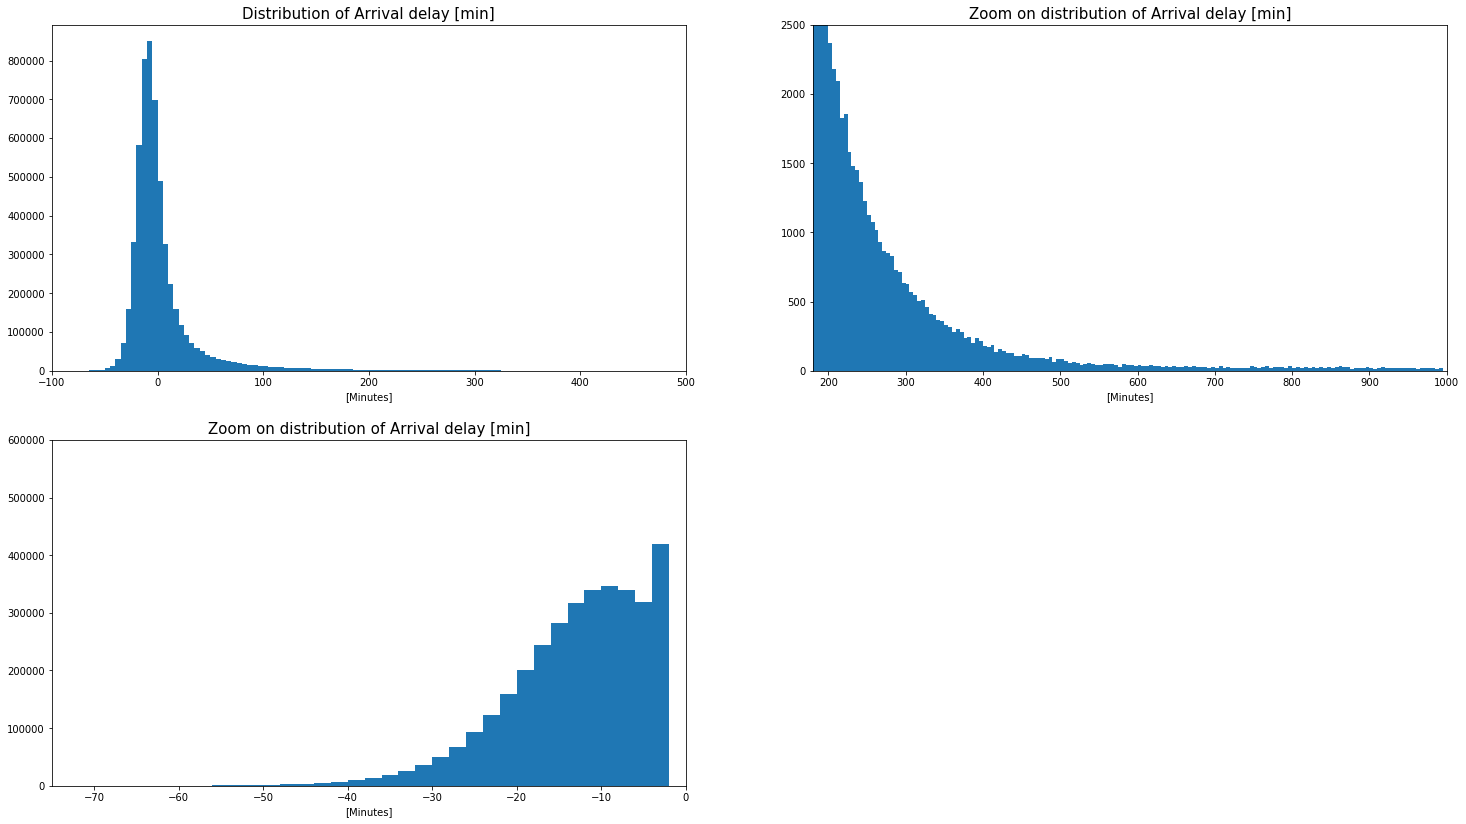

In [69]:
plt.figure(figsize = [25,14])
plt.subplot(2,2,1)
bin_edges = np.arange(-100,1000,5)
plt.hist(data=df_regression, x='ARR_DELAY',bins=bin_edges)
plt.xlim(-100,500)
plt.title('Distribution of Arrival delay [min]',fontsize=15)
plt.xlabel('[Minutes]',fontsize=10);

plt.subplot(2,2,2)
#bin_edges = np.arange(-500,df_regression.ARR_DELAY.max()+10,5)
plt.hist(data=df_regression, x='ARR_DELAY',bins=bin_edges)
plt.xlim(180,1000)
plt.ylim(0,2500)
plt.title('Zoom on distribution of Arrival delay [min]',fontsize=15)
plt.xlabel('[Minutes]',fontsize=10);



plt.subplot(2,2,3)
bin_edges_l = np.arange(-100,0,2)
plt.hist(data=df_regression, x='ARR_DELAY',bins=bin_edges_l)
plt.xlim(-75,0)
plt.ylim(0,600000)
plt.title('Zoom on distribution of Arrival delay [min]',fontsize=15)
plt.xlabel('[Minutes]',fontsize=10);

In [70]:
print("Quantile 1%: ",df_regression.ARR_DELAY.quantile(.01))
print("Quantile 99%: ",df_regression.ARR_DELAY.quantile(.99))

Quantile 1%:  -35.0
Quantile 99%:  172.0


In [71]:
# Removing those outliners
df_regression = df_regression[df_regression.ARR_DELAY > -35]

In [72]:
# Keeping rows with less than 172 hours delay (almost 3 hours)
df_regression = df_regression[df_regression.ARR_DELAY < 172]

##### Test

In [73]:
print(df_regression.ARR_DELAY.min())
print(df_regression.ARR_DELAY.max())

-34
171


#### Keeping specific columns for the regression

In [74]:
regression_col = ['UNIQUE_CARRIER', 'FL_DATE', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_HOUR',
                  'CRS_DEP_TIME','ARR_HOUR','CRS_ARR_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 
                  'DISTANCE', 'ARR_DELAY']

In [75]:
df_regression.shape

(5436183, 34)

In [76]:
df_regression = df_regression[regression_col]

In [79]:
df_regression.shape

(5436183, 13)

<a id='exporting'></a>
### Exporting Cleaned data in csv
<a href="#table">Back to table of content</a>

##### Export to use for the exploration (contains also data of cancelled flights)

In [77]:
df_flights.to_csv('df_flights_clean_JDH.csv', encoding='utf_8', index=False)

##### Export to use for the regression models (only data for NON-CANCELLED flights

In [78]:
df_regression.to_csv('df_regression_clean_JDH.csv', encoding='utf_8', index=False)